In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 68]
from plot_utils import *

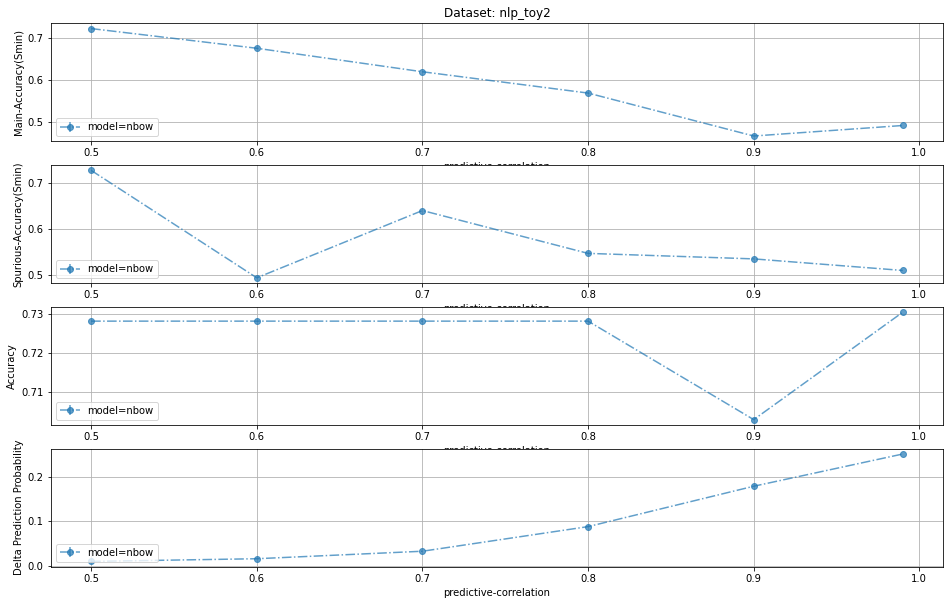

In [15]:
#Getting the pdict for each of the three dataset
run_list=[1,]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [16, 10]
plot_item_list = [
                    "topic1_smin",
                    "main_smin_topic1",
                    "acc:main",
                    "topic1_pdelta_all",
    
]
plot_item_custname = [ 
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)",
                    "Accuracy",
                    "Delta Prediction Probability"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
neg1_flip_method="remove_negation"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.3
h=10
e=20
s=1000


model_type_list=["nbow"]
dataset_list = ["nlp_toy2",]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
#         try:
        result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=e,
                                              fname_pattern="dataset/{}/nlp_logs/pt.rel.model_type({}).neg1_fmethod({}).lt({}).dropout_rate({}).l2({}).noise({}).hlayer({}).sample({}).epoch({}).pval({}).rnum({})/probe_metric_list.json".format(
                                                                                  dataset,
                                                                                  model_type,
                                                                                  neg1_flip_method,
                                                                                  lt,
                                                                                  drate,
                                                                                  l2,
                                                                                  n,
                                                                                  h,
                                                                                  s,
                                                                                  e,
                                                                                  "{}",
                                                                                  "{}",
                                          )
        )
#         except:
#             result_dict = None
        all_result_dict[dataset][model_type]=result_dict

conv_all_result_dict = all_result_dict.copy()
# print(all_result_dict)
#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            result_dict=dset_result_dict[model_type]
            if result_dict==None:
                continue
            
            yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
            yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
            ylb = [
                result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            yub = [ 
                result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                    for pval in pval_list
            ]
            #Plotting the guy
            ax[pidx].errorbar(pval_list,yval,yerr,label="model={}".format(model_type),ls="-.",marker="o",alpha=0.7)
            ax[pidx].fill_between(pval_list,ylb,yub,alpha=0.2)


            #Setting the plot attributes
#             ax[pidx].set_ylim(0.0,1.0)
            ax[pidx].set_xlabel("predictive-correlation")
            ax[pidx].set_ylabel(pname)



            ax[pidx].legend(loc=3)
            ax[pidx].grid(True)
            if pidx==0:
                ax[pidx].set_title("Dataset: {}".format(dataset))
plt.show()

# Plotting for the Adv Removal

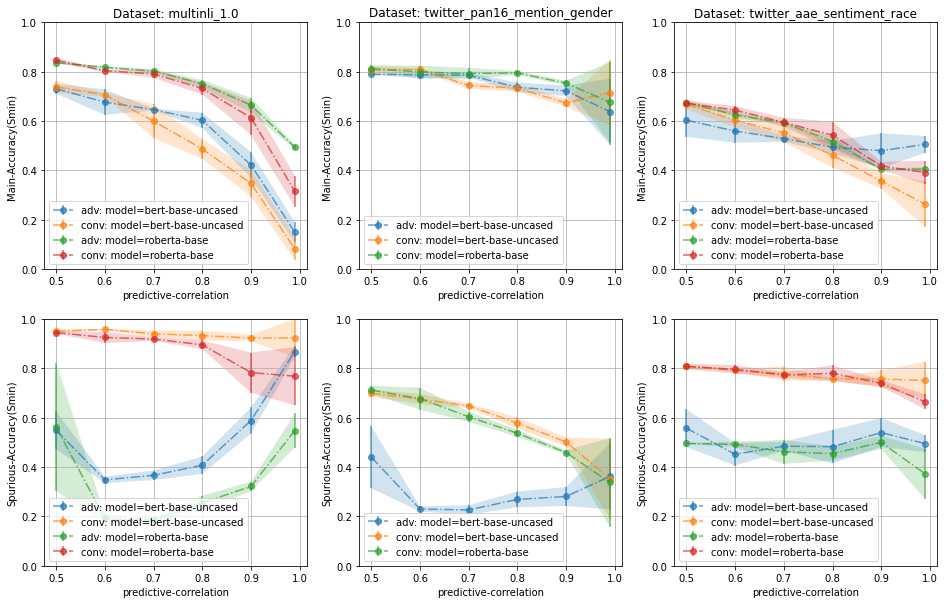

In [19]:
#Getting the pdict for each of the three dataset
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plt.rcParams['figure.figsize'] = [16, 10]
plot_item_list = [
                    "topic0_smin",
                    "main_smin_topic0"
]
plot_item_custname = [ 
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)"
]


ax=None

#Other hyperparam
model_type="bert-base-uncased"
neg1_fmethod="remove_negation"
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
d="non_causal"
n=0.0
h=0
remmode="adversarial"
adv_rm_method="adv_rm_with_main"
grstrength=0.1
advepoch=20
s=10000

model_type_list=["bert-base-uncased","roberta-base"]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

grstrength_dict={
            "multinli_1.0":{
                "bert-base-uncased":0.001,
                "roberta-base":0.001,
             },
            "twitter_pan16_mention_gender":{
                "bert-base-uncased":0.1,
                "roberta-base":0.01,#need rerun
             },
            "twitter_aae_sentiment_race":{
                "bert-base-uncased":1.0,
                "roberta-base":0.01,
             }
    
                
}

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "replace_negation"
        else:
            neg1_flip_method = "remove_negation"
        
        grstrength=grstrength_dict[dataset][model_type]
        
        try:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=advepoch,
                                          fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).adv_rm_method({}).grstrength({}).advepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).p({}).r({})/probe_metric_list.json".format(
                                                                              dataset,
                                                                              model_type,
                                                                              neg1_fmethod,
                                                                              remmode,
                                                                              adv_rm_method,
                                                                              grstrength,
                                                                              advepoch,
                                                                              lt,
                                                                              drate,
                                                                              l2,
                                                                              n,
                                                                              h,
                                                                              s,
                                                                              "{}",
                                                                              "{}",
                                      )
            )
        except:
            result_dict = None
        all_result_dict[dataset][model_type]=result_dict

adv_all_result_dict = all_result_dict.copy()
# print(all_result_dict)
#Now plotting all the reuslt in one single frame
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        for model_type in model_type_list:
            #print(result_dict)
            adv_result_dict=adv_all_result_dict[dataset][model_type]
            conv_result_dict=conv_all_result_dict[dataset][model_type]
            
            for dict_name,result_dict in [("adv",adv_result_dict),("conv",conv_result_dict)]:
                if result_dict==None:
                    continue

                yval = [result_dict[pval][item_name]["mean"] for pval in pval_list]
                yerr = [result_dict[pval][item_name]["std"] for pval in pval_list]
                ylb = [
                    result_dict[pval][item_name]["mean"]-result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                yub = [ 
                    result_dict[pval][item_name]["mean"]+result_dict[pval][item_name]["std"]
                        for pval in pval_list
                ]
                #Plotting the guy
                ax[pidx,didx].errorbar(pval_list,yval,yerr,label="{}: model={}".format(dict_name,model_type),ls="-.",marker="o",alpha=0.7)
                ax[pidx,didx].fill_between(pval_list,ylb,yub,alpha=0.2)


                #Setting the plot attributes
                ax[pidx,didx].set_ylim(0.0,1.0)
                ax[pidx,didx].set_xlabel("predictive-correlation")
                ax[pidx,didx].set_ylabel(pname)



                ax[pidx,didx].legend(loc=3)
                ax[pidx,didx].grid(True)
                if pidx==0:
                    ax[pidx,didx].set_title("Dataset: {}".format(dataset))
plt.show()

# Plotting the Null-Space Removal Results

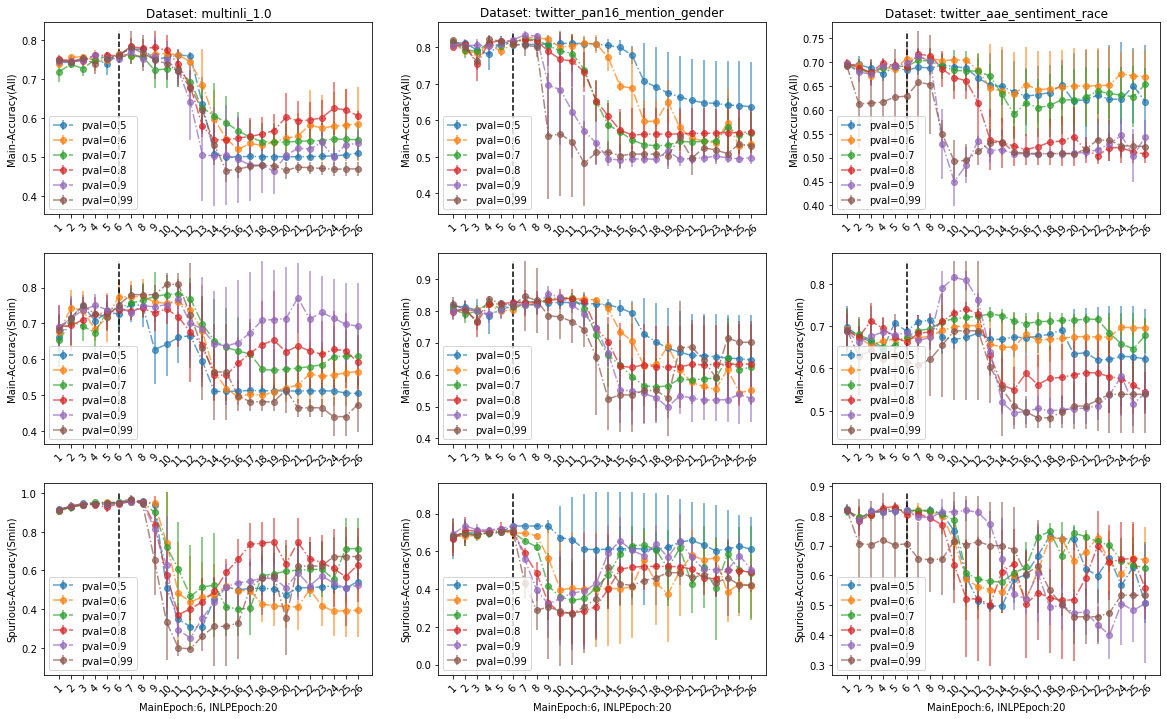

In [22]:
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
plot_item_list = [
                    "angle:m-t0",
                    "acc:main",
                    "acc:topic0",
                    "main_smin_topic0",
                    "topic0_smin",
                    "topic0_main",
                    "topic0_pdelta_m1t1",
                    "topic0_pdelta_m1t0",
                    "topic0_pdelta_m0t1",
                    "topic0_pdelta_m0t0",
                    "topic0_pdelta_smin",
                    "topic0_pdelta_all",
                    "topic0_logpdelta",
]
plt.rcParams['figure.figsize'] = [20, 12]
plot_item_list = [
                    "acc:main",
                    "topic0_smin",
                    "main_smin_topic0"
]
plot_item_custname = [ 
                    "Main-Accuracy(All)",
                    "Main-Accuracy(Smin)",
                    "Spurious-Accuracy(Smin)"
]


ax=None

#Other hyperparam
lt="x_entropy"
drate=0.0
l2=0.0
hretrain="no_warm_encoder"
mainmode="causal"
n=0.0
h=0
mainepoch=6
s=10000

model_type="bert-base-uncased"
remmode="null_space"
advepoch=20
topicepoch=1
neg1_flip_method="remove_negation"


model_type_list=["bert-base-uncased","roberta-base",]
dataset_list = ["multinli_1.0","twitter_pan16_mention_gender","twitter_aae_sentiment_race"]

all_result_dict = defaultdict(dict)
for dataset in dataset_list:
    for model_type in model_type_list:
        if dataset == "twitter_aae_sentiment_race" and model_type=="bert-base-uncased":
            neg1_flip_method = "remove_negation"
        else:
            neg1_flip_method = "remove_negation"
        
        try:
            result_dict = get_all_result_timeline(run_list=run_list,
                                                  pval_list=pval_list,
                                                  fname_pattern="dataset/{}/nlp_logs/pt.rel.mt({}).neg1_fmethod({}).remmode({}).advepoch({}).topicepoch({}).lt({}).drate({}).l2({}).n({}).h({}).s({}).e({}).p({}).r({})/probe_metric_list.json".format(
                                                                                          dataset,
                                                                                          model_type,
                                                                                          neg1_flip_method,
                                                                                          remmode,
                                                                                          advepoch,
                                                                                          topicepoch,
                                                                                          lt,
                                                                                          drate,
                                                                                          l2,
                                                                                          n,
                                                                                          h,
                                                                                          s,
                                                                                          mainepoch,
                                                                                          "{}",
                                                                                          "{}",
                                                  )
            )
        except:
            result_dict=None
        all_result_dict[dataset][model_type]=result_dict
        
model_type="bert-base-uncased"       
fig,ax = plt.subplots(len(plot_item_list),len(all_result_dict))
for pidx,(item_name,pname) in enumerate(zip(plot_item_list,plot_item_custname)):
    for didx,(dataset,dset_result_dict) in enumerate(all_result_dict.items()):
        result_timeline = dset_result_dict[model_type]
        if result_timeline==None:
            continue
        
        min_yval = 1
        max_yval = 0
        for pval in pval_list:
            pdict_timeline = result_timeline[pval]

            x_val = range(1,len(pdict_timeline[item_name]["mean"])+1) #Denotes the number of epoch
            y_val = pdict_timeline[item_name]["mean"]
            y_err = pdict_timeline[item_name]["std"]
            if min(y_val-y_err)<min_yval:
                min_yval=min(y_val-y_err)
            if max(y_val+y_err)>max_yval:
                max_yval=max(y_val+y_err)


            ax[pidx,didx].errorbar(x_val,y_val,y_err,marker="o",ls="-.",label="pval={}".format(pval),alpha=0.7)
            


            
            
            
            ax[pidx,didx].set_ylabel(pname)
            ax[pidx,didx].set_xticks([val for val in x_val])
            ax[pidx,didx].set_xticklabels([str(val) for val in x_val],rotation=45)


            if pidx==1:
                ax[pidx,didx].legend(loc=3)
            else:
                ax[pidx,didx].legend(loc=3)
#             ax[pidx,didx].set_ylim(0.0,1.0)
#             ax[pidx,didx].grid(True)
            if pidx==0:
                ax[pidx,didx].set_title("Dataset: {}".format(dataset))
            if pidx==(len(plot_item_list)-1):
                ax[pidx,didx].set_xlabel("MainEpoch:{}, INLPEpoch:{}".format(mainepoch,advepoch))
            
        #Spearating the training and removal phase
        partition_yval = np.linspace(min_yval,max_yval,10)
        partition_xval = [mainepoch]*len(partition_yval)
#         print(partition_yval)
        ax[pidx,didx].plot(partition_xval,partition_yval,ls="--",color="k")

plt.show()